In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

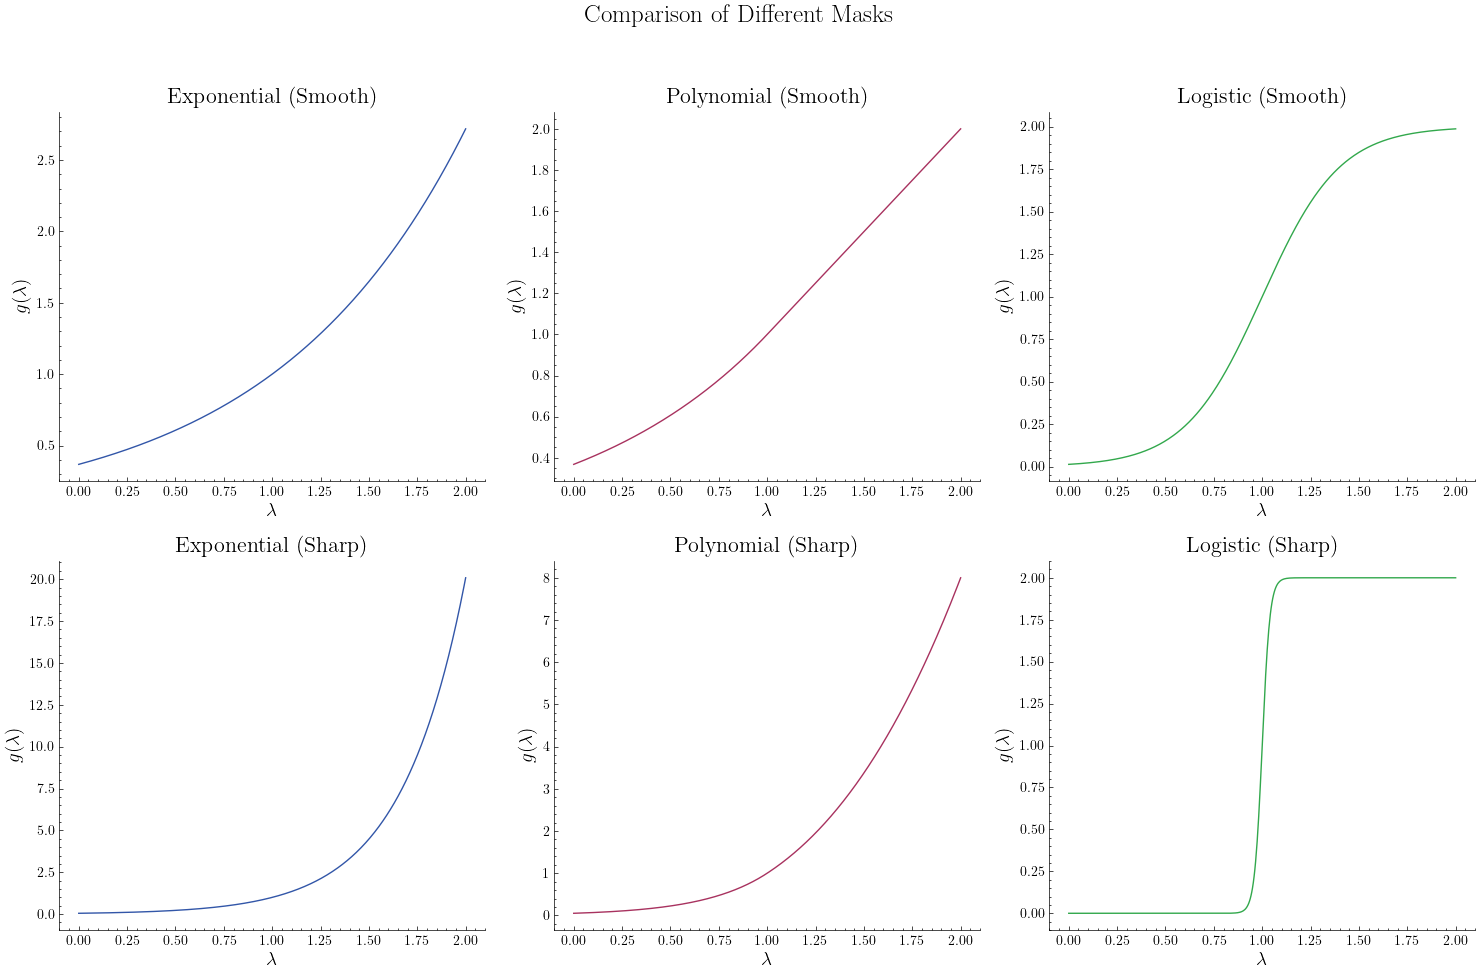

In [14]:
import numpy as np
x = np.linspace(0, 2, 500)

def get_a(λ_mask, λ_smooth_or_sharp):
    if λ_mask == "logistic":
        return 5. if λ_smooth_or_sharp == "smooth" else 50.
    elif λ_mask in ["polynomial", "exponential"]:
        return 1. if λ_smooth_or_sharp == "smooth" else 3.

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
colors = ['#3256a8', '#a8325f', '#32a84c']

for i, λ_smooth_or_sharp in enumerate(["smooth", "sharp"]):
    for j, λ_mask in enumerate(["exponential", "polynomial", "logistic"]):
        a = get_a(λ_mask, λ_smooth_or_sharp)
        AVAILABLE_MASKS = {
            "exponential": lambda λ: jnp.exp(jnp.abs(a) * (λ - 1)),
            "polynomial": lambda λ: jnp.where(λ >= 1, λ ** jnp.abs(a), jnp.exp(jnp.abs(a) * (λ - 1))),
            "logistic": lambda λ: 2 / (1 + jnp.exp(jnp.abs(a) * (-λ + 1))),
        }
        ax = axs[i, j]
        mask = AVAILABLE_MASKS[λ_mask]
        y = mask(x)
        ax.plot(x, y, label='Mask', color=colors[j])

        # Capitalize the first letter of each word in the title
        ax.set_title(f"{λ_mask.capitalize()} ({λ_smooth_or_sharp.capitalize()})", fontsize=16)
        ax.tick_params(top=False,
                       right=False, 
                       which='both')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(r'$\lambda$', fontsize=14)
        ax.set_ylabel(r'$g(\lambda)$', fontsize=14)

fig.suptitle('Comparison of Different Masks', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('other/masks.svg') 
plt.show()